In [26]:
# Imports
using Gurobi
using LinearAlgebra
using JuMP
using Random
using LaTeXStrings
include("regress.jl");
include("convexRegress.jl");
include("bin_to_leaves.jl");

In [2]:
# Generating monomial data
a = 1; b = 2; 
x = range(1, stop=20, step=1);
y = range(1, stop=20, step=1);
X = zeros(size(x,1)*size(y,1), 2)
for i=1:size(x,1)
    for j=1:size(y,1)
        X[(i-1)*size(y,1)+j, :] = [x[i], y[j]];
    end
end
Y = 76 .*X[:,1].^0.32./X[:,2].^0.7;

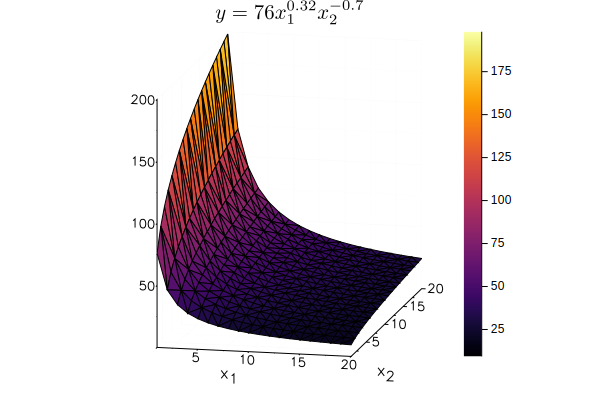

In [3]:
# Plotting data along two X-axes, in original space
using Plots
plt3d = Plots.plot(X[:,2], X[:,1], Y[:,1],
     seriestype=:surface, markersize = 2, camera=(20,30))
xlabel!("x_1"); ylabel!("x_2"); title!(L"$y = 76x_1^{0.32}x_2^{-0.7}$")
display(plt3d)

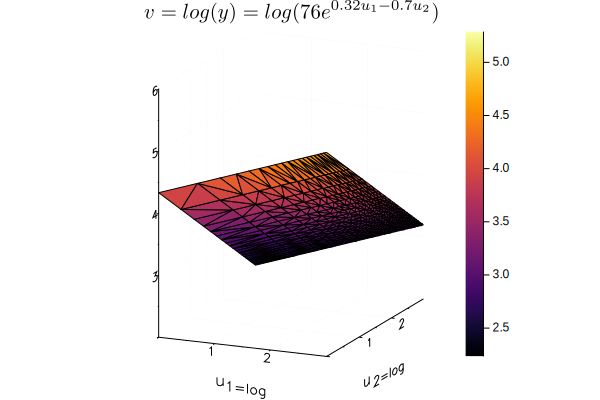

In [4]:
# Plotting data in log-space
using Plots
u = log.(X);
v = log.(Y);
plt3d = Plots.plot(u[:,1], u[:,2], v[:,1],
     seriestype=:surface, markersize = 2)
xlabel!("u_1=log(x_1)"); ylabel!("u_2=log(x_2)"); title!(L"$v = log(y) = log(76e^{0.32u_1-0.7u_2})$")
display(plt3d)

In [13]:
bs, b0, ts, ss = regress(v, u, 0.00001, 0, 100.)

Optimize a model with 5 rows, 7 columns and 11 nonzeros
Model has 1 quadratic constraint
Variable types: 5 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+02]
  QMatrix range    [1e+00, 6e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 2 columns
Presolve time: 0.00s
Presolved: 4 rows, 5 columns, 8 nonzeros
Presolved model has 6 quadratic objective terms
Variable types: 3 continuous, 2 integer (2 binary)

Root relaxation: objective 1.020317e-07, 12 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2          -    0.00000      -     -    0s
H    0     0                       0.0000200    0.00000  99.5%     -    0s
     0     0     cutoff    0         0.00002    0.00002  0.00%     -    0s

Explored 0 nodes (1

([0.32, -0.7], 4.330733340286648, 3.0411229090532288e-12, 2.0e-5)

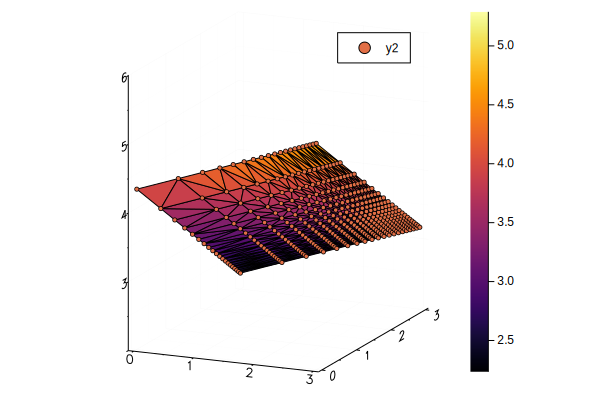

In [16]:
# Plotting actual vs. predictions
plt3d = Plots.plot(u[:,1], u[:,2], v[:,1],
     seriestype=:surface, markersize = 2);
Plots.plot!(u[:,1], u[:,2], u*bs .+ b0,
     seriestype=:scatter, markersize = 2);
display(plt3d)

In [24]:
# Solving for...
thetas, ksis = convexRegress(v,u,100);

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Optimize a model with 400 rows, 1200 columns and 1220 nonzeros
Model has 1198 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-02, 3e+00]
  Objective range  [2e+00, 5e+00]
  QObjective range [1e+00, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 382 columns
Presolve time: 0.00s
Presolved: 399 rows, 818 columns, 1216 nonzeros
Presolved model has 818 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 818
 AA' NZ     : 3.980e+02
 Factor NZ  : 6.480e+03 (roughly 1 MByte of memory)
 Factor Ops : 1.357e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   0.00000000e+00  0.00000000e+00  0.00e+00 5.29e+00  1.00e+06     0s
   1   3.45835419e+05 -3.50120721e+05  1.06e-01 5.85e

Cut 261 added: [301, 80]
Cut 262 added: [302, 86]
Cut 263 added: [303, 9]
Cut 264 added: [304, 65]
Cut 265 added: [305, 1]
Cut 266 added: [306, 32]
Cut 267 added: [307, 3]
Cut 268 added: [308, 52]
Cut 269 added: [309, 26]
Cut 270 added: [310, 19]
Cut 271 added: [311, 5]
Cut 272 added: [312, 33]
Cut 273 added: [313, 6]
Cut 274 added: [314, 8]
Cut 275 added: [315, 14]
Cut 276 added: [316, 10]
Cut 277 added: [317, 4]
Cut 278 added: [318, 6]
Cut 279 added: [319, 10]
Cut 280 added: [320, 59]
Cut 281 added: [321, 98]
Cut 282 added: [322, 14]
Cut 283 added: [323, 21]
Cut 284 added: [324, 12]
Cut 285 added: [325, 6]
Cut 286 added: [326, 51]
Cut 287 added: [327, 34]
Cut 288 added: [328, 4]
Cut 289 added: [329, 68]
Cut 290 added: [330, 53]
Cut 291 added: [331, 26]
Cut 292 added: [332, 12]
Cut 293 added: [333, 25]
Cut 294 added: [334, 5]
Cut 295 added: [335, 10]
Cut 296 added: [336, 23]
Cut 297 added: [337, 20]
Cut 298 added: [338, 52]
Cut 299 added: [339, 18]
Cut 300 added: [340, 36]
Cut 301 add

┌ Warning: Gurobi reported infeasible or unbounded. Set InfUnbdInfo=1 for more specific status.
└ @ Gurobi C:\Users\Berk\.julia\packages\Gurobi\dlJep\src\MPB_wrapper.jl:440
┌ Warning: Not solved to optimality, status: InfeasibleOrUnbounded
└ @ JuMP C:\Users\iai\builds\InterpretableAI\SysImgBuilder\.julia\packages\JuMP\I7whV\src\solvers.jl:212
┌ Warning: Variable value not defined for component of ksi. Check that the model was properly solved.
└ @ JuMP C:\Users\iai\builds\InterpretableAI\SysImgBuilder\.julia\packages\JuMP\I7whV\src\JuMP.jl:480
┌ Warning: Variable value not defined for component of theta. Check that the model was properly solved.
└ @ JuMP C:\Users\iai\builds\InterpretableAI\SysImgBuilder\.julia\packages\JuMP\I7whV\src\JuMP.jl:480
┌ Warning: Variable value not defined for component of theta. Check that the model was properly solved.
└ @ JuMP C:\Users\iai\builds\InterpretableAI\SysImgBuilder\.julia\packages\JuMP\I7whV\src\JuMP.jl:480
┌ Warning: Variable value not defined f

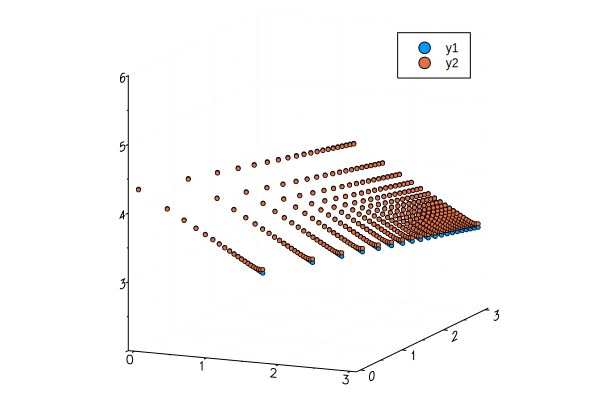

In [81]:
# Plotting actual vs. predictions
plt3d = Plots.plot(u[:,1], u[:,2], v[:,1],
     seriestype=:scatter, markersize = 2);
Plots.plot!(u[:,1], u[:,2], thetas,
     seriestype=:scatter, markersize = 2);
display(plt3d)


In [25]:
# Now let's try coupling these methods with Optimal Regression Trees!
# First with parallel splits
lnr = IAI.OptimalTreeRegressor(random_seed=1, max_depth=3, cp=0.001, minbucket=0.05, regression_sparsity=:all)
IAI.fit!(lnr, u, v)


┌ Warning: This copy of Interpretable AI software is for academic purposes only and not for commercial use.
└ @ IAIBase C:\Users\iai\builds\InterpretableAI\SysImgBuilder\.julia\packages\IAIBase\ymcNn\src\precompile.jl:19
Training trees...100%|██████████████████████████████████| Time: 0:00:05


Fitted OptimalTreeRegressor:
  1) Predict: 0.3171 * x1 - 0.6971 * x2 + 4.331, 400 points, error 1.483

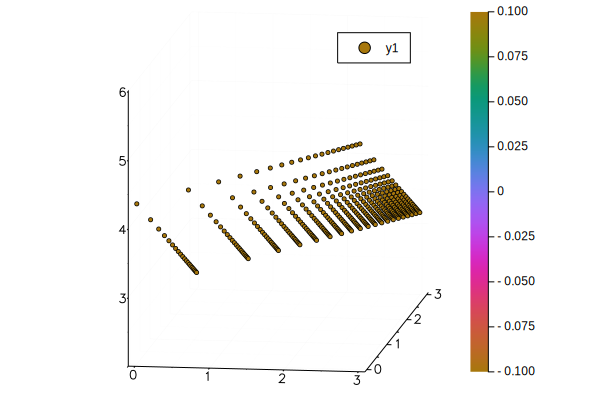

In [27]:
# Plotting actual vs. predictions
vpredict = IAI.predict(lnr, u)
leaf_index, leaves = bin_to_leaves(lnr, u)
display(Plots.plot(u[:,1], u[:,2], vpredict,
     seriestype=:scatter, markersize = 2, zcolor=leaf_index, seriescolor=:phase, camera = (15, 30));)